In [1]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cvzone
import cv2
import math
import numpy as np
# from sort import *

In [2]:
model = YOLO('./yolo_model/yolov8n.pt')
# classes = model.names

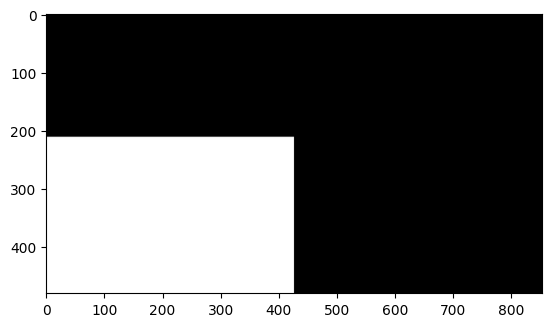

In [3]:
mask = cv2.imread('./images/car_vid_mask.jpg')
mask = cv2.resize(mask, (854, 480))
plt.imshow(mask)

In [4]:
# Classes i want to recognice.
classes = {
    2: 'car',
    3: 'motorcycle',
    5: 'bus',
    7: 'truck'
}

In [ ]:
cam = cv2.VideoCapture('./images/my_videos/car_vid480.mp4')
# cam.set(cv2.CAP_PROP_POS_MSEC, 1*60*1000)

while True:
    success, img = cam.read()
    image_region = cv2.bitwise_and(img, mask)
 
    results = model(image_region, stream=True)

    for result in results:
        boxes = result.boxes

        for box in boxes:
            x1, y1, x2, y2 = box.xyxy[0]
            x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
            # cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0,0), 3) # Con cv2.
            

            conf = math.ceil((box.conf[0]*100))/100
            cls = int(box.cls[0])
            
            if cls in classes and conf >= 0.3:
                cvzone.cornerRect(img, (x1, y1, x2-x1, y2-y1), t=2, colorC=(255, 0, 0), colorR=(255, 0, 0), l=1)
                cvzone.putTextRect(img, f'{classes[cls]} {conf}', (x1, y1-15), scale=1, thickness=1, colorR=(255, 0, 0))

    cv2.imshow('Car recognition', img)

    if cv2.waitKey(1) != -1:
        break

# Destruye las ventanas y libera la camara.
cam.release()
cv2.destroyAllWindows()

Demo

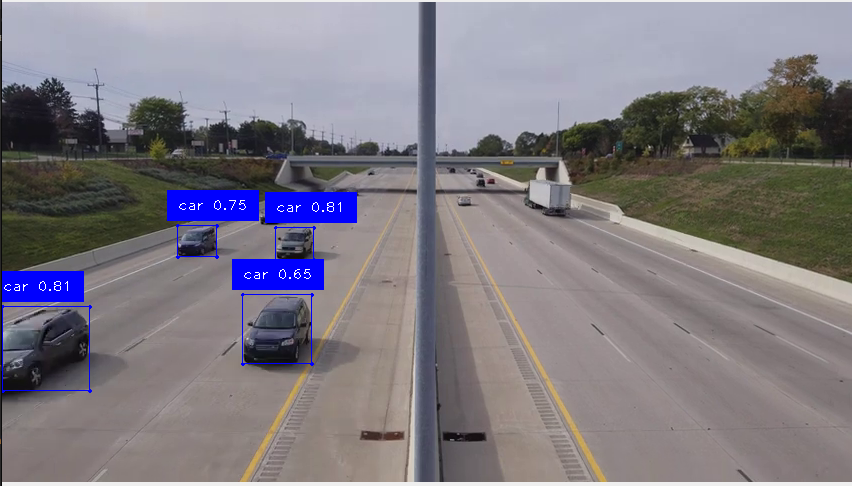